In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar dataset
df = pd.read_csv("./Transformados/Dataset_clustering.csv", sep = ';')
df.head()

,Provincia,Trimestre,Anio,homicidios_consumados,drogas,homicidios_tentativa,lesiones,secuestro,sexual_agresion,sexual_otros,...,Desigualdad_p80p20,Soc_num_sociedades_sa,Soc_desmboldo_sociedades_sa,Soc_num_sociedades_sl,Soc_desembolso_sociedades_sl,Soc_num_sociedades_total,Soc_desembolso_sociedades_total,Paro_tasa_actividad,Paro_tasa_paro,Paro_tasa_empleo
0,Albacete,1,2017,0.000000,0.383048,0.025537,0.715023,0.0,0.000000,0.280902,...,2.8,2,120,597,21072,599,21192,57.42,24.48,43.36
1,Albacete,1,2018,0.025659,0.307913,0.000000,0.615827,0.0,0.076978,0.564508,...,2.7,2,215,611,48812,613,49027,58.97,23.82,44.92
2,Albacete,1,2019,0.000000,0.334508,0.000000,0.874866,0.0,0.025731,0.720478,...,2.6,2,75,666,52544,668,52619,57.38,17.85,47.13
3,Albacete,1,2020,0.000000,0.309125,0.000000,0.695532,0.0,0.025760,0.412167,...,2.6,3,175,486,9362,489,9537,56.58,20.72,44.85
4,Albacete,1,2021,0.000000,0.464056,0.000000,0.515618,0.0,0.051562,0.592961,...,2.6,3,164,617,21662,620,21826,57.58,19.93,46.10


In [3]:
# Variables seleccionadas para clustering
#features = [columna for columna in df.columns if columna not in ['Provincia','Anio','Trimestre']]
features = ['homicidios_consumados',
             'drogas',
             'homicidios_tentativa',
             'lesiones',
             'secuestro',
             'sexual_agresion',
             'sexual_otros',
             'robos_violencia',
             'robos_fuerza',
             'hurtos',
             'vehiculos',
             'resto']

In [4]:
#Dataframe con features para el clustering
df_clust = df[features]
df_clust.head()

,homicidios_consumados,drogas,homicidios_tentativa,lesiones,secuestro,sexual_agresion,sexual_otros,robos_violencia,robos_fuerza,hurtos,vehiculos,resto
0,0.000000,0.383048,0.025537,0.715023,0.0,0.000000,0.280902,0.995924,7.584347,22.701968,1.046997,38.381393
1,0.025659,0.307913,0.000000,0.615827,0.0,0.076978,0.564508,0.846762,5.927332,20.809812,0.590167,39.233296
2,0.000000,0.334508,0.000000,0.874866,0.0,0.025731,0.720478,1.929851,6.072598,21.717259,0.514627,48.915295
3,0.000000,0.309125,0.000000,0.695532,0.0,0.025760,0.412167,1.081939,4.379276,19.449139,0.515209,43.689721
4,0.000000,0.464056,0.000000,0.515618,0.0,0.051562,0.592961,0.773427,3.016366,11.214693,0.464056,47.978262


In [5]:
# Escalar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clust)

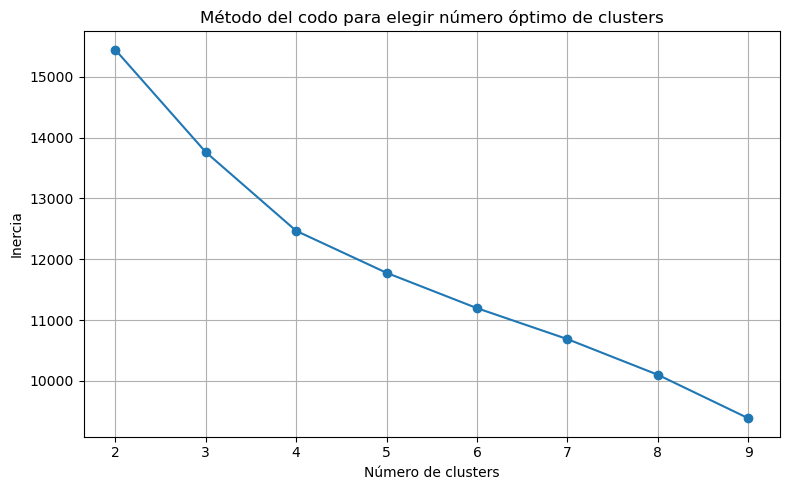

In [6]:
# Método del codo
inertia = []
K = range(2, 10)
for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    inertia.append(model.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, marker='o')
plt.title("Método del codo para elegir número óptimo de clusters")
plt.xlabel("Número de clusters")
plt.ylabel("Inercia")
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
# Aplicar clustering (elige K manualmente)
k_optimo = 4
kmeans = KMeans(n_clusters=k_optimo, random_state=42)
df["cluster"] = kmeans.fit_predict(X_scaled)

# Resultados
print("Distribución de clusters:")
print(df["cluster"].value_counts())

print("\nPromedio por cluster:")
print(df.groupby("cluster")[features].mean())




Distribución de clusters:
cluster
1    866
0    626
3    127
2     45
Name: count, dtype: int64

Promedio por cluster:
         homicidios_consumados    drogas  homicidios_tentativa  lesiones  \
cluster                                                                    
0                     0.019017  0.952659              0.059877  1.346683   
1                     0.012830  0.565929              0.038143  0.884826   
2                     0.084149  5.108307              0.273423  2.721705   
3                     0.018965  1.330455              0.072985  1.613397   

         secuestro  sexual_agresion  sexual_otros  robos_violencia  \
cluster                                                              
0         0.005869         0.135289      0.783925         2.068342   
1         0.002041         0.079936      0.484085         0.825867   
2         0.018459         0.096915      0.944340         5.553495   
3         0.004802         0.282420      0.977414         5.354377   

   

In [ ]:
# Visualización
sns.scatterplot(data=df, x="Inm_De Asia", y="vehiculos", hue="cluster", palette="tab10")
plt.title("Clusters según Tasa de Paro y Gini")
plt.tight_layout()
plt.show()

In [18]:
# Guardar resultado
df.to_csv("Resultados_Clustering_tipología_delitos.csv", index=False)

In [ ]:
df.head()

In [12]:
df[['Provincia','cluster']].groupby(['Provincia','cluster']).value_counts().to_clipboard()

In [11]:
df.to_clipboard()

In [17]:
df.groupby("cluster")[features].mean().to_clipboard()

In [19]:
df.groupby("cluster")[features].min().to_clipboard()

In [16]:
df.groupby("cluster")[features].max()

,homicidios_consumados,drogas,homicidios_tentativa,lesiones,secuestro,sexual_agresion,sexual_otros,robos_violencia,robos_fuerza,hurtos,vehiculos,resto
cluster,,,,,,,,,,,,
0,0.180081,4.325148,0.361224,3.742997,0.116466,0.467202,2.012096,6.701416,17.831721,53.631681,3.654891,91.025255
1,0.221301,3.075004,0.443055,2.461582,0.112867,0.566059,1.237366,4.584510,10.163122,33.692743,2.151062,86.380390
2,0.602040,13.588080,1.800591,6.327075,0.237804,0.356705,2.352803,12.581665,5.280946,39.041683,8.035071,118.781879
3,0.070705,4.082575,0.253639,4.514725,0.026335,0.998633,2.478637,11.268269,17.041829,113.583718,5.297886,120.276903
